# Fe(s) + CH4(g) = Fe3C(s) + 2H2(g)
Deta G =  99,633 - 119.74 T"   (727-1137˚C)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def CH4_decompose(T, P):
    delta_G = 98633 - 119.74*T
    K = math.exp(-delta_G/(8.314*T))
    x = (-K+math.sqrt(K**2+4*K*P))/4
    P_H2=2*x
    P_CH4= P-P_H2
    #print(P_H2, P_CH4)
    return delta_G, K, P_CH4

In [3]:
T=range(1050, 1400, 20)
P=[1] * len(T)
results=list(map(CH4_decompose,T, P))

P2 = [item * 2 for item in P]
#print(P2)
results2=list(map(CH4_decompose,T, P2))
#print(results)

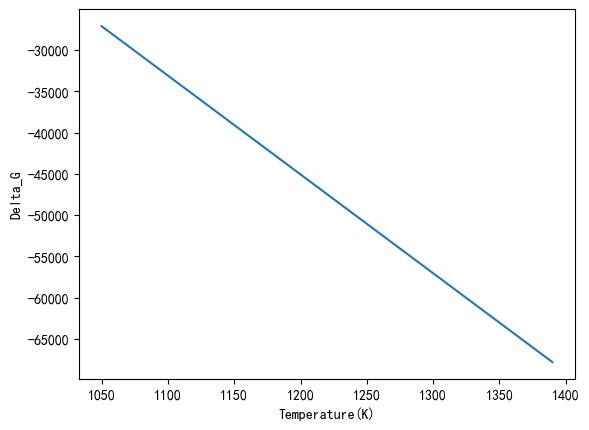

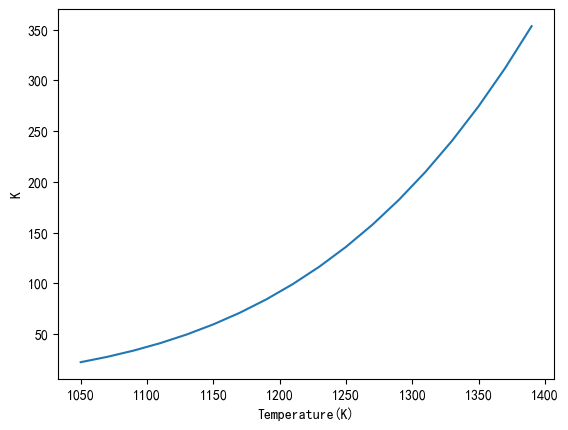

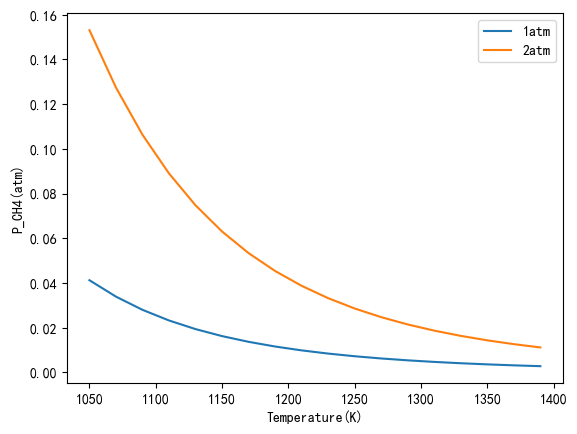

In [4]:
delta_G_values = [result[0] for result in results]
K = [result[1] for result in results]
P_CH4 = [result[2] for result in results]

P2_CH4 = [result[2] for result in results2]

plt.figure(1)
plt.plot(T, delta_G_values)
plt.xlabel('Temperature(K)')
plt.ylabel("Delta_G")

plt.figure(2)
plt.plot(T, K)
plt.xlabel('Temperature(K)')
plt.ylabel("K")

plt.figure(3)
plt.plot(T, P_CH4, label="1atm")
plt.plot(T, P2_CH4, label="2atm")
plt.xlabel('Temperature(K)')
plt.ylabel("P_CH4(atm)")
plt.legend()

plt.show()

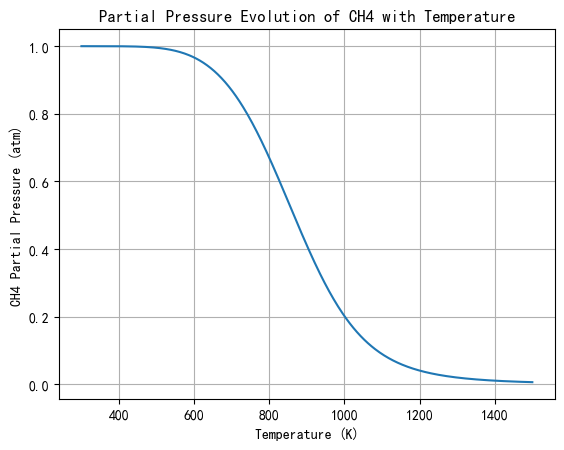

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.314  # J/(mol*K)

def delta_G(T):
    return 98633 - 119.74*T

def Kp(T):
    return np.exp(-delta_G(T) / (R * T))

def CH4_partial_pressure(T, P0=1.0):  # assuming initial pressure of CH4 is 1 atm
    # Kp = (2x)^2 / (P0 - x)
    # solve the quadratic equation: (2x)^2 - Kp*P0 + Kp*x = 0
    K = Kp(T)
    a = 4
    b = K
    c = -K * P0

    # use the quadratic formula, and choose the root that makes physical sense
    x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

    x = x1 if 0 < x1 < P0 else x2

    return P0 - x

temperatures = np.linspace(300, 1500, 500)  # temperature range: 300K to 1500K
pressures = [CH4_partial_pressure(T) for T in temperatures]

plt.plot(temperatures, pressures)
plt.xlabel("Temperature (K)")
plt.ylabel("CH4 Partial Pressure (atm)")
plt.title("Partial Pressure Evolution of CH4 with Temperature")
plt.grid(True)
plt.show()
